In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
dataset = pd.read_csv("heart.csv")

In [4]:
print(dataset.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [5]:
print(type(dataset))


<class 'pandas.core.frame.DataFrame'>


In [6]:
print(dataset.shape)


(303, 14)


In [7]:
print(dataset.head(5))


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [8]:
print(dataset.sample(5))

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
163   38    1   2       138   175    0        1      173      0      0.0   
174   60    1   0       130   206    0        0      132      1      2.4   
150   66    1   0       160   228    0        0      138      0      2.3   
137   62    1   1       128   208    1        0      140      0      0.0   
243   57    1   0       152   274    0        1       88      1      1.2   

     slope  ca  thal  target  
163      2   4     2       1  
174      1   2     3       0  
150      2   0     1       1  
137      2   0     2       1  
243      1   1     3       0  


In [9]:
print(dataset.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
info = ["age", "1: male, 0: female",
            "chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic",
            "resting blood pressure", " serum cholestoral in mg/dl", "fasting blood sugar > 120 mg/dl",
            "resting electrocardiographic results (values 0,1,2)", " maximum heart rate achieved",
            "exercise induced angina", "oldpeak = ST depression induced by exercise relative to rest",
            "the slope of the peak exercise ST segment", "number of major vessels (0-3) colored by flourosopy",
            "thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

In [12]:
    for i in range(len(info)):
        print(dataset.columns[i] + ":\t\t\t" + info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [13]:
dataset["target"].describe()

,target
count,303.000000
mean,0.544554
std,0.498835
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [14]:
print(dataset["target"].unique())

[1 0]


In [15]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [16]:
y = dataset["target"]
print("y",y)

y 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


<Axes: ylabel='count'>

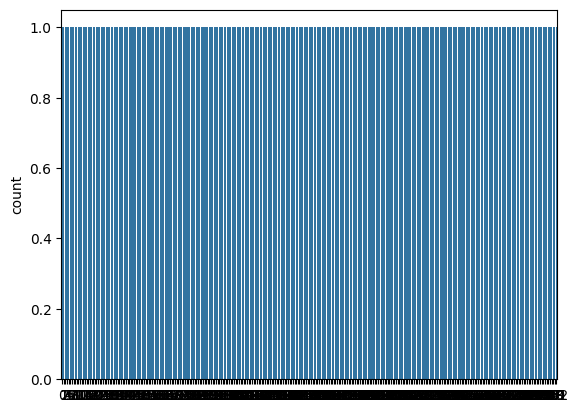

In [17]:
sns.countplot(y)

In [18]:
print("Dataset Head",dataset.head(25))

Dataset Head     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    63    1   3       145   233    1        0      150      0      2.3   
1    37    1   2       130   250    0        1      187      0      3.5   
2    41    0   1       130   204    0        0      172      0      1.4   
3    56    1   1       120   236    0        1      178      0      0.8   
4    57    0   0       120   354    0        1      163      1      0.6   
5    57    1   0       140   192    0        1      148      0      0.4   
6    56    0   1       140   294    0        0      153      0      1.3   
7    44    1   1       120   263    0        1      173      0      0.0   
8    52    1   2       172   199    1        1      162      0      0.5   
9    57    1   2       150   168    0        1      174      0      1.6   
10   54    1   0       140   239    0        1      160      0      1.2   
11   48    0   2       130   275    0        1      139      0      0.2   
12   49    1

In [19]:
target_temp = dataset.target.value_counts()

In [20]:
print("target Label Count=",target_temp)

target Label Count= target
1    165
0    138
Name: count, dtype: int64


In [21]:
print("Percentage of patience without heart problems: " + str(round(target_temp[0] * 100 / 303, 2)))

Percentage of patience without heart problems: 45.54


In [22]:
print("Percentage of patience with heart problems: " + str(round(target_temp[1] * 100 / 303, 2)))

Percentage of patience with heart problems: 54.46


In [23]:
print(dataset["sex"].unique())

[1 0]


<Axes: ylabel='sex'>

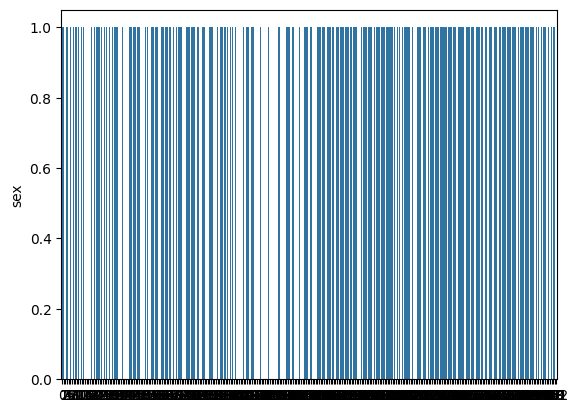

In [24]:
sns.barplot(dataset["sex"])

In [25]:
dataset["cp"].unique()

array([3, 2, 1, 0])

<Axes: ylabel='cp'>

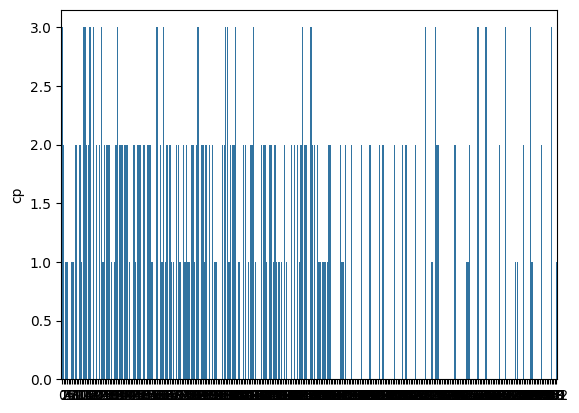

In [26]:
sns.barplot(dataset["cp"])

In [27]:
dataset["fbs"].describe()


,fbs
count,303.000000
mean,0.148515
std,0.356198
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [28]:
dataset["fbs"].unique()


array([1, 0])

<Axes: ylabel='fbs'>

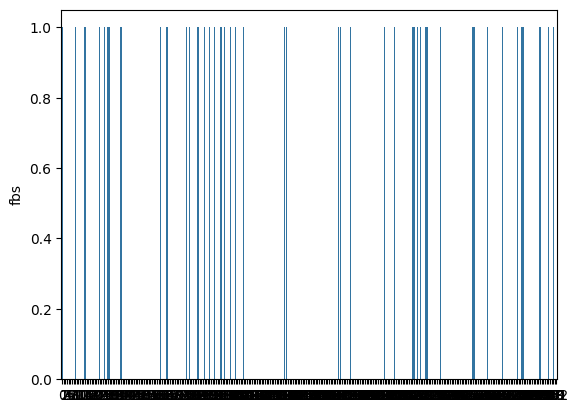

In [29]:
sns.barplot(dataset["fbs"])


In [30]:
dataset["restecg"].unique()


array([0, 1, 2])

<Axes: ylabel='restecg'>

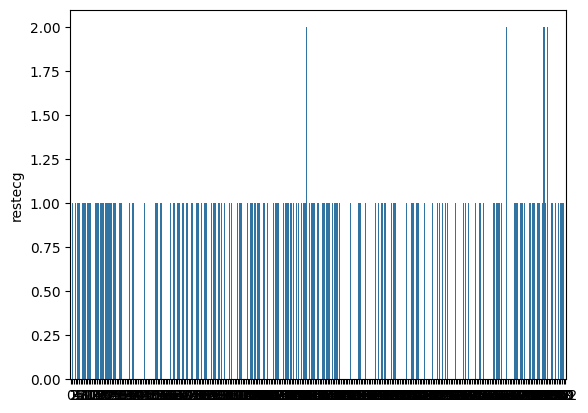

In [31]:
sns.barplot(dataset["restecg"])


In [32]:
dataset["exang"].unique()


array([0, 1])

<Axes: ylabel='exang'>

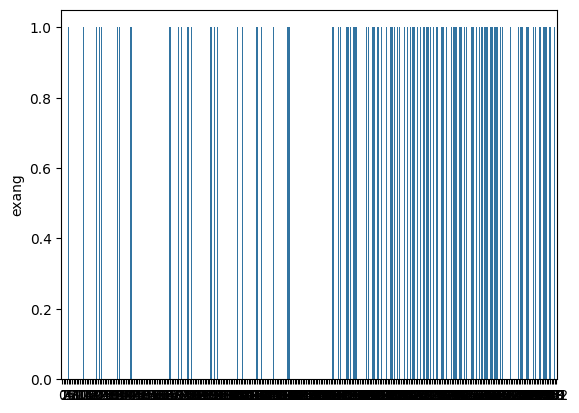

In [33]:
sns.barplot(dataset["exang"])


In [34]:
dataset["slope"].unique()


array([0, 2, 1])

<Axes: ylabel='slope'>

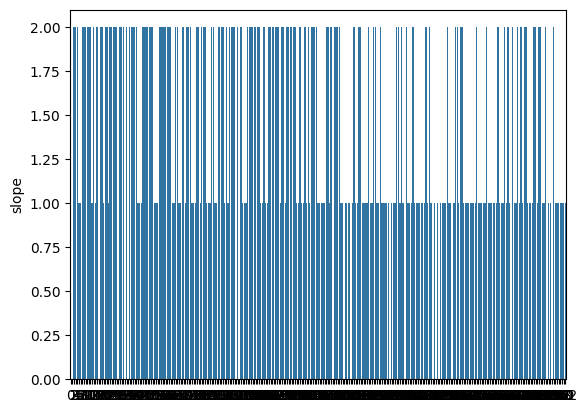

In [36]:
sns.barplot(dataset["slope"])


In [37]:
dataset["ca"].unique()


array([0, 2, 1, 3, 4])

<Axes: ylabel='count'>

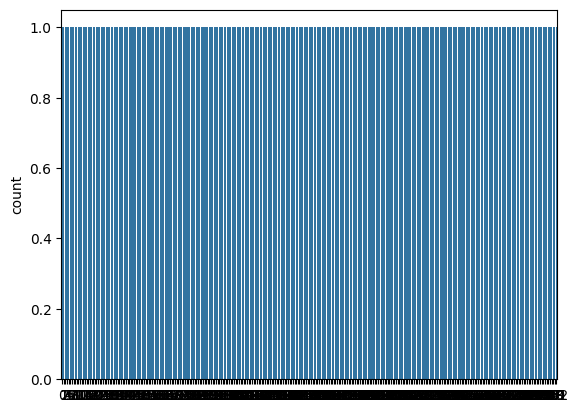

In [41]:
sns.countplot(dataset["ca"])


<Axes: ylabel='ca'>

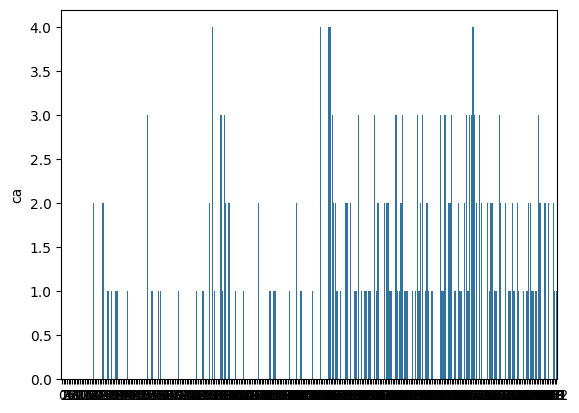

In [40]:
sns.barplot(dataset["ca"])


In [39]:
dataset["thal"].unique()


array([1, 2, 3, 0])

<Axes: ylabel='thal'>

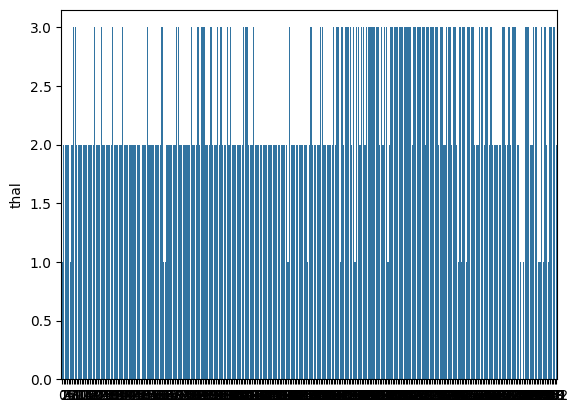

In [43]:
sns.barplot(dataset["thal"])


<ipython-input-42-72e8c6b01ba2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["thal"])


<Axes: xlabel='thal', ylabel='Density'>

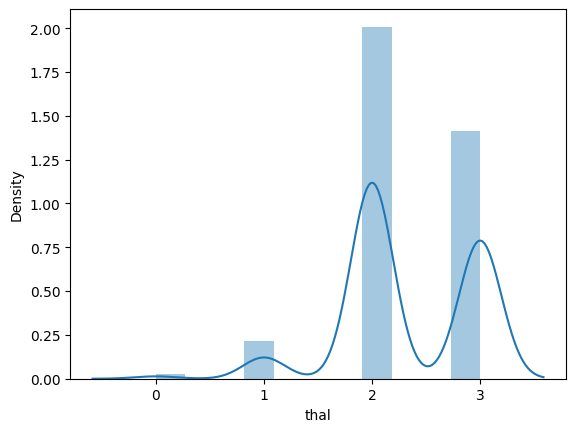

In [42]:
sns.distplot(dataset["thal"])


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
predictors = dataset.drop("target", axis=1)


In [46]:
target = dataset["target"]

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)
X_train.shape
print(X_train.shape)

(242, 13)


In [48]:
X_test.shape
print(X_test.shape)


(61, 13)


In [49]:
Y_train.shape
print(Y_train.shape)


(242,)


In [50]:
Y_test.shape
print(Y_test.shape)

(61,)


In [51]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [52]:
lr = LogisticRegression()

In [53]:
lr.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
Y_pred_lr = lr.predict(X_test)
Y_pred_lr.shape
print(Y_pred_lr.shape)


(61,)


In [55]:
score_lr = round(accuracy_score(Y_pred_lr, Y_test) * 100, 2)

In [56]:
print("The accuracy score achieved using Linear regression is: " + str(score_lr) + " %")

The accuracy score achieved using Linear regression is: 85.25 %


In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
nb = GaussianNB()

In [ ]:
nb.fit(X_train, Y_train)



In [60]:
Y_pred_nb = nb.predict(X_test)


In [61]:
Y_pred_nb.shape
print(Y_pred_nb.shape)


(61,)


In [62]:
score_nb = round(accuracy_score(Y_pred_nb, Y_test) * 100, 2)



In [63]:
print("The accuracy score achieved using Naive Bayes is: " + str(score_nb) + " %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [64]:
#svm
from sklearn import svm
sv = svm.SVC(kernel='linear')



In [65]:
sv.fit(X_train, Y_train)
Y_pred_svm = sv.predict(X_test)
Y_pred_svm.shape
print(Y_pred_svm.shape)

(61,)


In [66]:
score_svm = round(accuracy_score(Y_pred_svm, Y_test) * 100, 2)
print("The accuracy score achieved using Linear SVM is: " + str(score_svm) + " %")

The accuracy score achieved using Linear SVM is: 81.97 %


In [67]:
# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [68]:
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
Y_pred_knn.shape
print(Y_pred_knn.shape)


(61,)


In [69]:
score_knn = round(accuracy_score(Y_pred_knn, Y_test) * 100, 2)
print("The accuracy score achieved using KNN is: " + str(score_knn) + " %")

The accuracy score achieved using KNN is: 67.21 %


In [70]:
score_knn = round(accuracy_score(Y_pred_knn, Y_test) * 100, 2)
print("The accuracy score achieved using KNN is: " + str(score_knn) + " %")

The accuracy score achieved using KNN is: 67.21 %


In [71]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
max_accuracy = 0



In [72]:
for x in range(200):
  dt = DecisionTreeClassifier(random_state=x)
  dt.fit(X_train, Y_train)
  Y_pred_dt = dt.predict(X_test)
  current_accuracy = round(accuracy_score(Y_pred_dt, Y_test) * 100, 2)
  if (current_accuracy > max_accuracy):
    max_accuracy = current_accuracy
    best_x = x

In [73]:
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)
print(Y_pred_dt.shape)


(61,)


In [74]:
score_dt = round(accuracy_score(Y_pred_dt, Y_test) * 100, 2)
print("The accuracy score achieved using Decision Tree is: " + str(score_dt) + " %")

The accuracy score achieved using Decision Tree is: 81.97 %


In [103]:
# Neural Network
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()


In [104]:
model.add(Dense(11, activation='relu', input_dim=13))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [105]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [106]:
model.fit(X_train, Y_train, epochs=300)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6536 - loss: 3.6406  
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6506 - loss: 3.3275 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6541 - loss: 2.4133 
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6631 - loss: 2.3871 
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6277 - loss: 2.8535 
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6719 - loss: 2.2877 
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6986 - loss: 2.1487 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6679 - loss: 1.9585 
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6520 - loss: 1.9632 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7043 - loss: 1.5604 
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7075 - loss: 1.5715 
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6652 - lo

In [107]:
Y_pred_nn = model.predict(X_test)
Y_pred_nn.shape
print(Y_pred_nn.shape)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
(61, 1)


In [108]:
rounded = [round(x[0]) for x in Y_pred_nn]


In [109]:
Y_pred_nn = rounded
score_nn = round(accuracy_score(Y_pred_nn, Y_test) * 100, 2)
print("The accuracy score achieved using Neural Network is: " + str(score_nn) + " %")



The accuracy score achieved using Neural Network is: 80.33 %


In [110]:
scores = [score_lr, score_nb, score_svm, score_knn, score_dt, score_nn]
algorithms = ["LR", "Naive Bayes", "SVM", "K-Nearest Neighbors", "Decision Tree", "Neural Network"]


In [111]:
for i in range(len(algorithms)):
  print("The accuracy score achieved using " + algorithms[i] + " is: " + str(scores[i]) + " %")
  sns.set(rc={'figure.figsize': (15, 8)})

The accuracy score achieved using LR is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using SVM is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Neural Network is: 80.33 %


Text(0.5, 0, 'Algorithms')

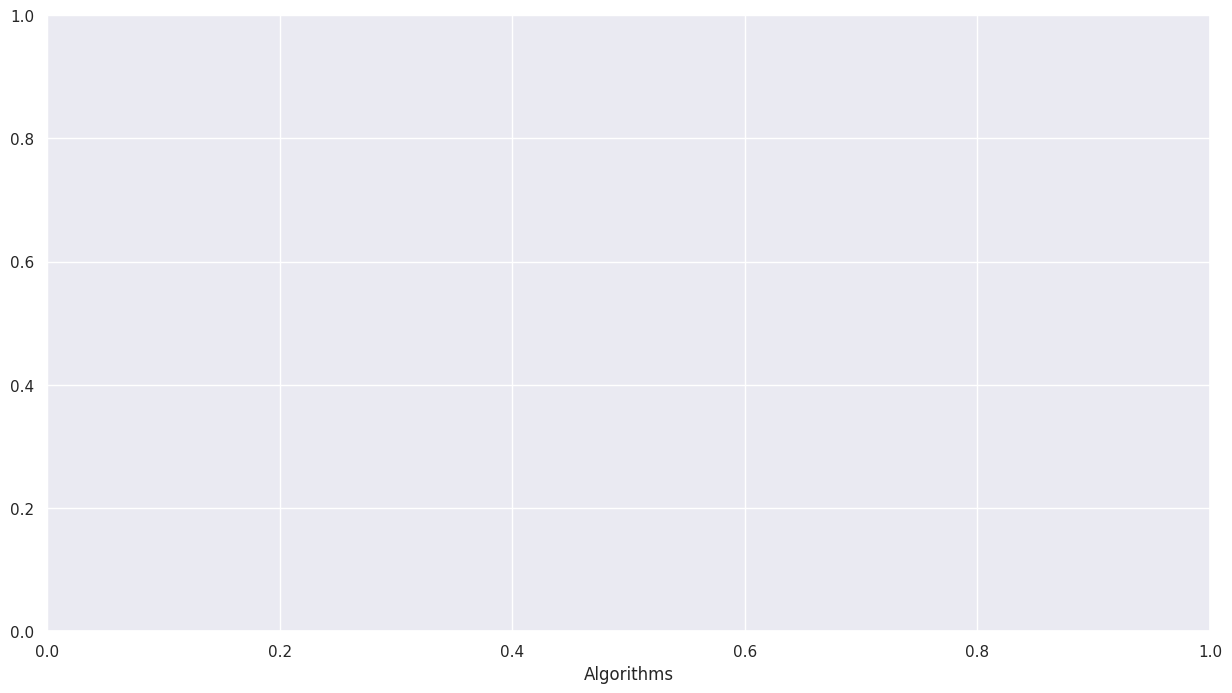

In [112]:
plt.xlabel("Algorithms")

Text(0, 0.5, 'Accuracy score')

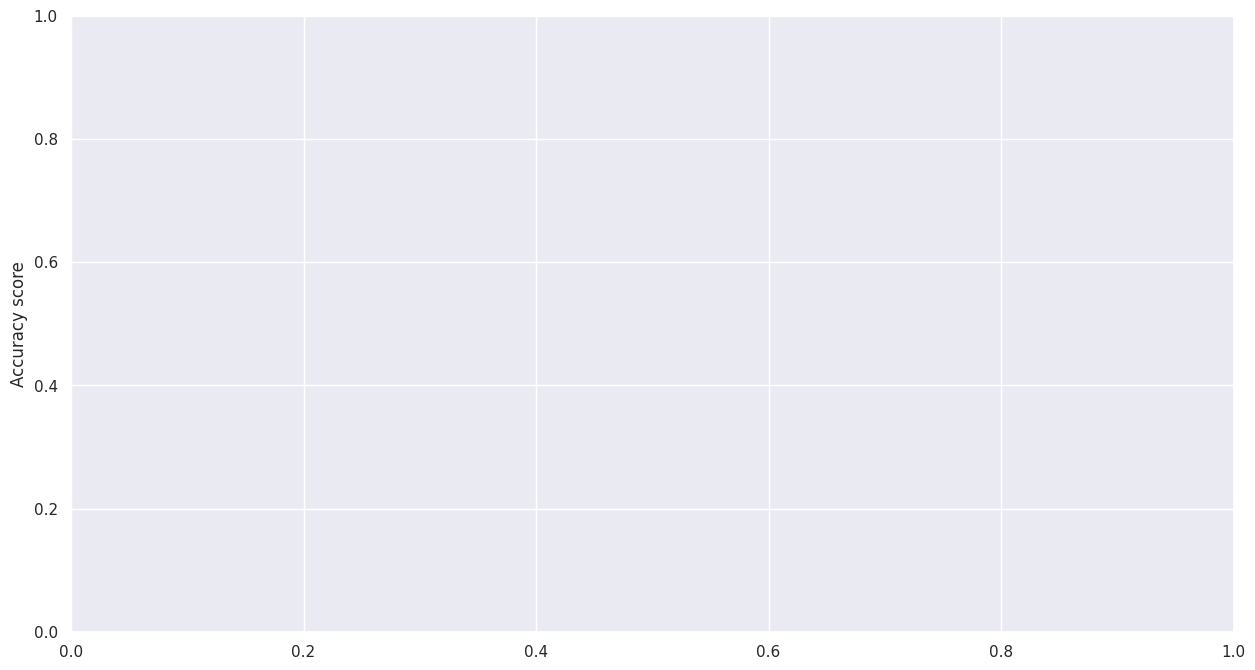

In [113]:
plt.ylabel("Accuracy score")



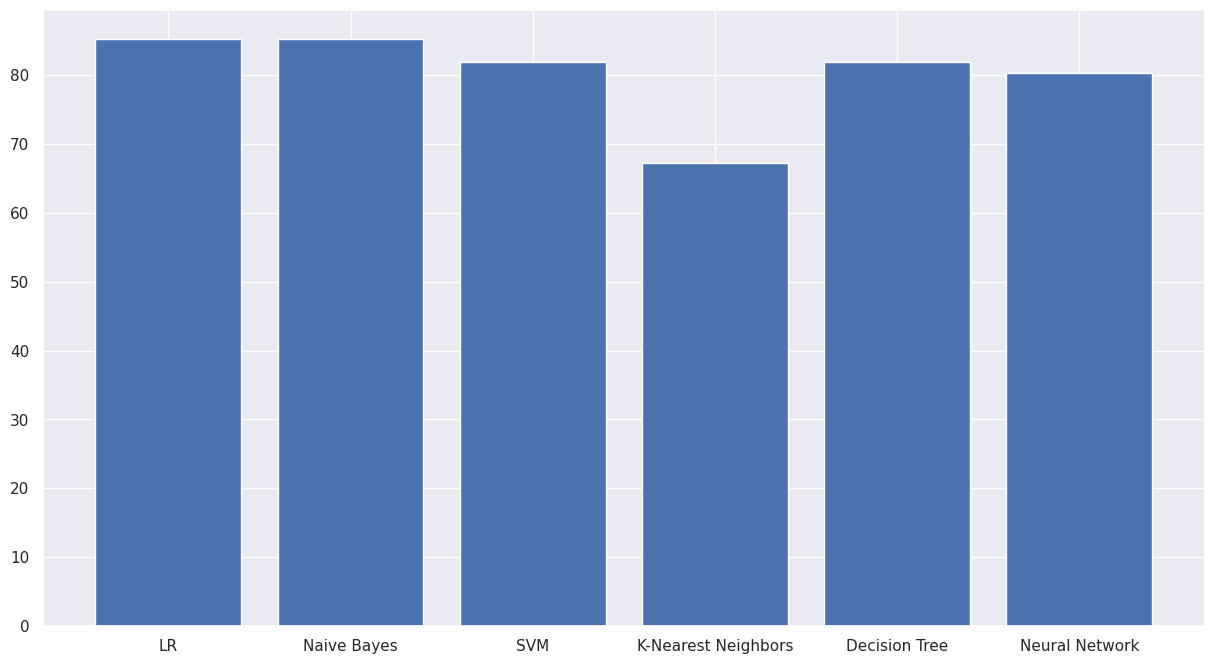

In [122]:
plt.bar(algorithms,scores)
plt.show()


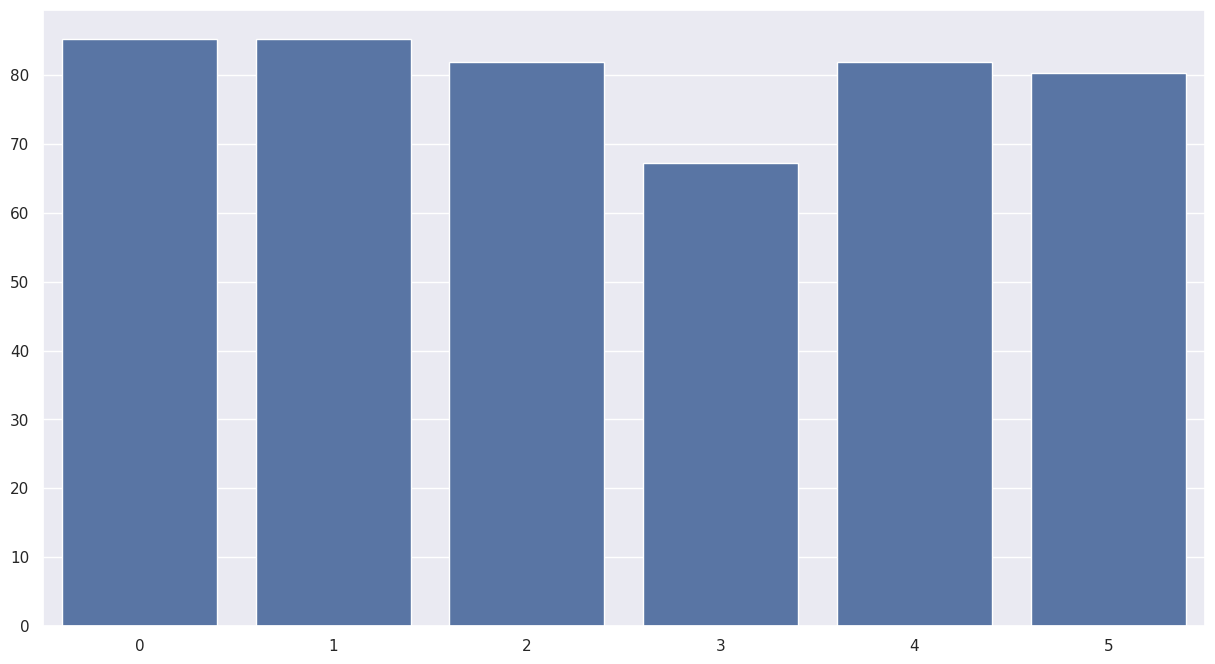